# supervision with categorical labels

In [1]:
import stream2 as st2

### Read data

In [2]:
adata = st2.read_h5ad('../data/methylation/layers_promoter.h5ad')

### Seed graph

In [3]:
st2.tl.seed_graph(adata,n_clusters=20)
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['Neuron type'],key='seed_epg')

Seeding initial graph...
Clustering...
K-Means clustering ...
Calculating minimum spanning tree...


If the seeded graph does not follow the path we want, we can supervise graph initialization with labels and paths to favor or disfavor (paths_favored, paths_disfavored) with a given strength (label_strength)

Seeding initial graph...
Clustering...
K-Means clustering ...
Calculating minimum spanning tree...


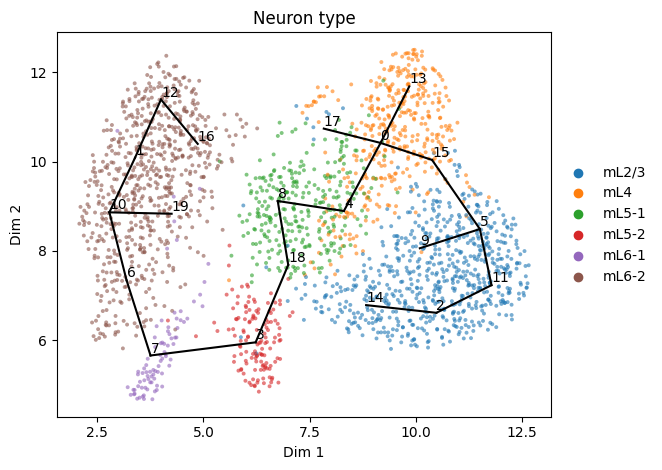

In [16]:
st2.tl.seed_graph(adata,n_clusters=20,
                  label='Neuron type',
                  label_strength=2.,
                  paths_disfavored=[['mL5-1','mL6-2']],
                 )
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['Neuron type'],key='seed_epg')

Here we could have achieved the same using paths_favored instead

Seeding initial graph...
Clustering...
K-Means clustering ...
Calculating minimum spanning tree...


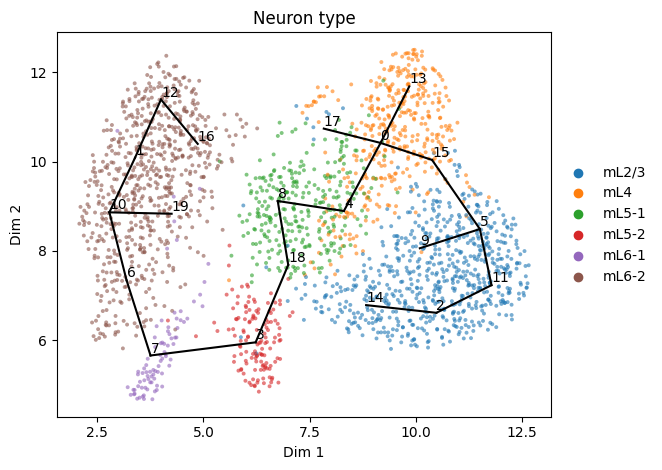

In [17]:
st2.tl.seed_graph(adata,n_clusters=20,
                  label='Neuron type',
                  label_strength=2.,
                  paths_favored=[['mL5-2','mL6-1']],
                 )
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['Neuron type'],key='seed_epg')

We now refine the seed graph and turn it into a principal graph

In [18]:
st2.tl.learn_graph(adata,use_seed=True,verbose=True)

Constructing tree 1 of 1 / Subset 1 of 1
Computing EPG with  50  nodes on  2278  points and  2  dimensions

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

3||21	0.9472	21	20	13	3	0	0	0.6047	0.5356	0.9504	0.956	0.2221	0.1204	2.5289	53.1059	0
2||22	0.8878	22	21	16	2	0	0	0.5984	0.5342	0.9509	0.9561	0.2027	0.0867	1.9067	41.9484	0
1||23	0.8284	23	22	19	1	0	0	0.5802	0.52	0.9524	0.9573	0.1885	0.0597	1.373	31.5779	0
1||24	0.812	24	23	20	1	0	0	0.5655	0.5083	0.9536	0.9583	0.1859	0.0607	1.4562	34.9481	0
1||25	0.7908	25	24	21	1	0	0	0.5524	0.4971	0.9547	0.9592	0.1828	0.0556	1.3892	34.7305	0
1||26	0.7767	26	25	22	1	0	0	0.5438	0.4937	0.9554	0.9595	0.1773	0.0556	1.4467	37.6136	0
1||27	0.7606	27	26	23	1	0	0	0.5312	0.4833	0.9564	0.9603	0.1762	0.0533	1.4382	38.8327	0
1||28	0.741	28	27	24	1	0	0	0.5222	0.4763	0.9571	0.9609	0.1718	0.047	1.3162	36.8534	0
1||29	0.7285	29	28	25	1	0	0	0.5143	0.4712	0.9578	0.9613	0.1676	0.0466	1.3504	39.1621	0
1||30	0.7178	30	29	26	

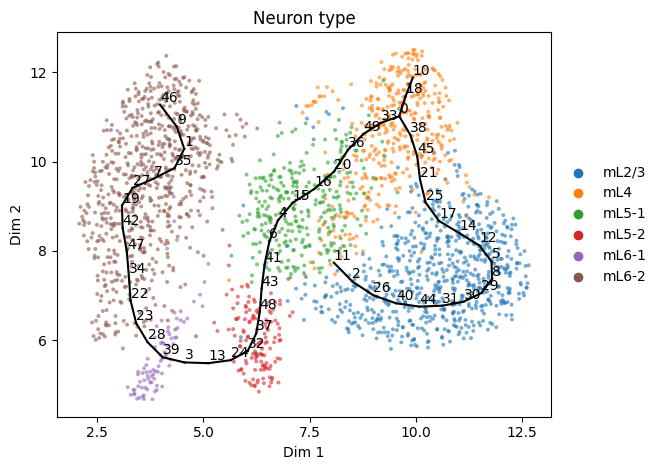

In [19]:
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['Neuron type'])

### Fine-tuning graphs

We can further fine-tune the graph by deleting an unwanted branch/path between nodes

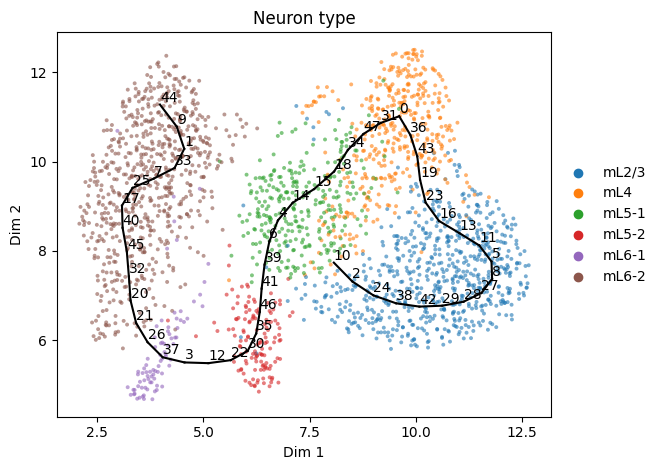

In [20]:
st2.tl.del_path(adata,0,10)
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['Neuron type'])

We can also fine-tune the graph by adding a path between nodes

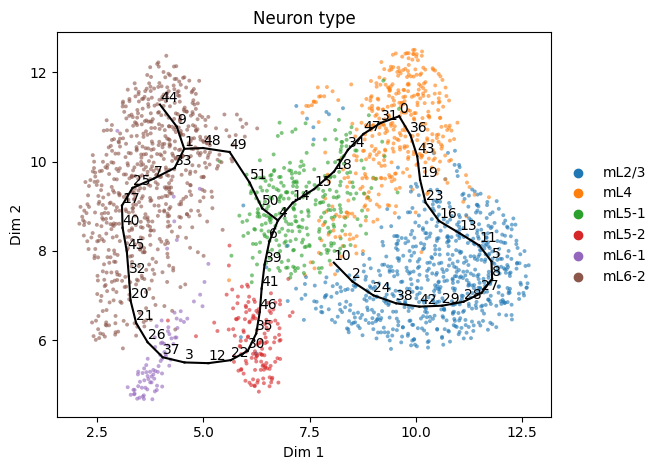

In [21]:
st2.tl.add_path(adata,4,1,n_nodes=None)
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['Neuron type'])

Or a path between a node and specified coordinates

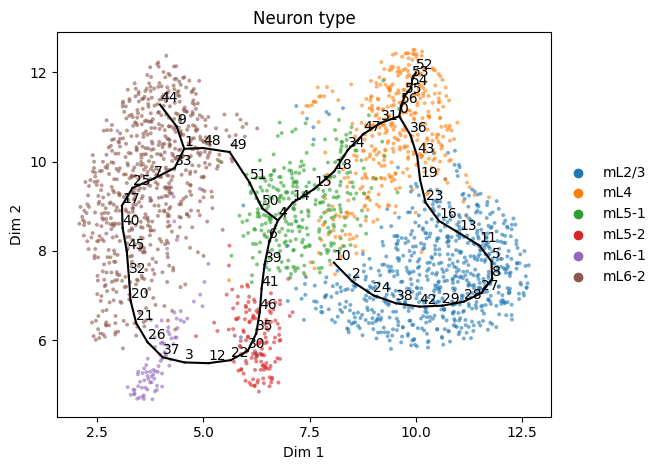

In [22]:
st2.tl.add_path(adata,0,[10,12],n_nodes=None,epg_mu=1)
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['Neuron type'])

We now compute the pseudotime given a root node

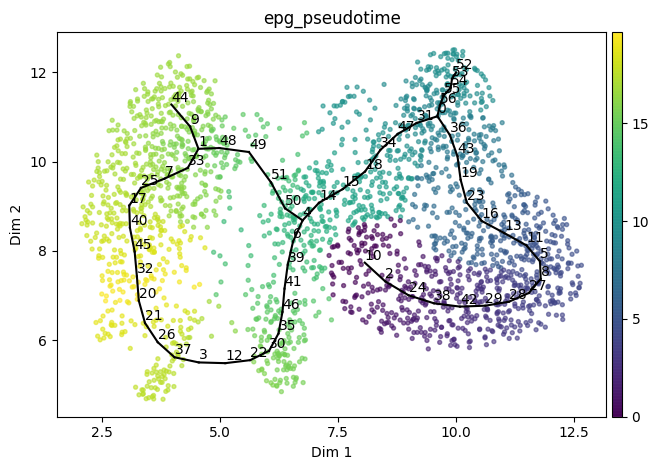

In [23]:
st2.tl.infer_pseudotime(adata,source=10,key='epg')
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['epg_pseudotime'])

We can also compute the pseudotime for a given path and specify nodes to include in the path

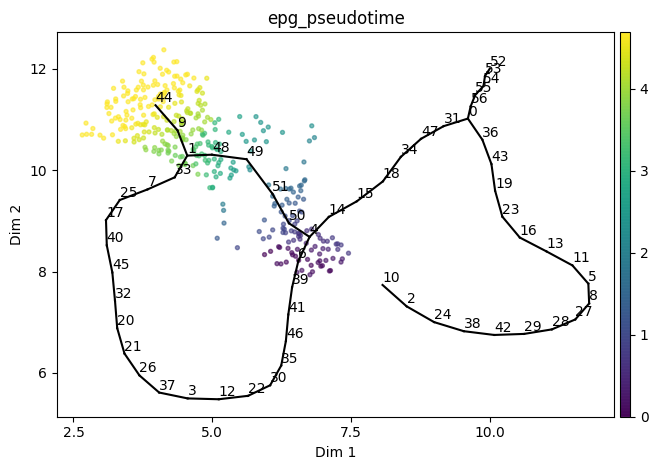

In [24]:
st2.tl.infer_pseudotime(adata,source=6,target=44,key='epg')
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['epg_pseudotime'])

If we wanted to compute pseudotime for the path from above instead, we can specify nodes to include in the path

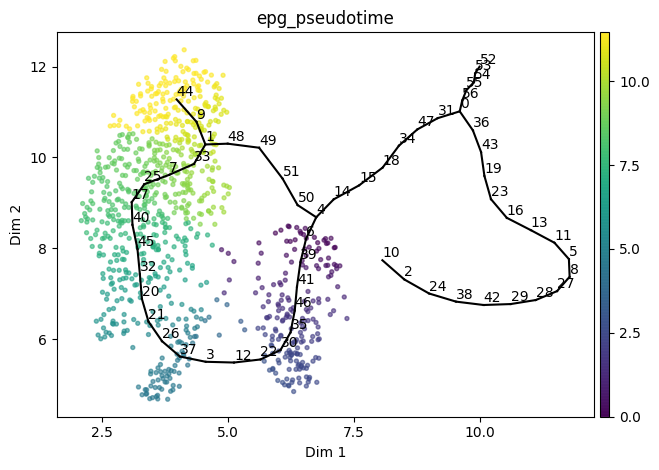

In [25]:
st2.tl.infer_pseudotime(adata,source=6,target=44,nodes_to_include=[25],key='epg')
st2.pl.graph(adata,show_text=True,alpha=0.6,color=['epg_pseudotime'])